<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/sklearn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [1]:
!pip install sklearn

##Data Load

In [18]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True).data # X
y = fetch_california_housing(as_frame=True).target # y

print(X.shape, y.shape)

(20640, 8) (20640,)


##Data Preprocessing + EDA

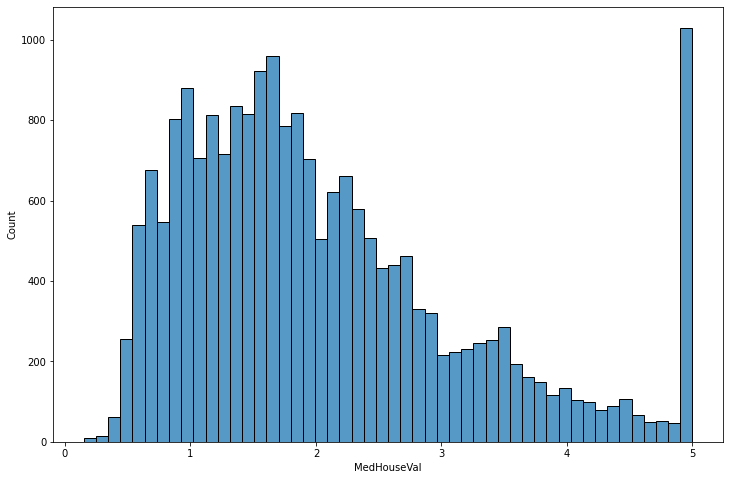

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. 결측치 확인
# X.info()
X[X.isnull().any(axis=1)]
# 2. dtype이 object인 column이 있는지 확인 --> categorical feature를 확인하기 위해!

# 3 target distribution
plt.figure(figsize=(12,8))
sns.histplot(y, bins = 50)
plt.show() # 5 이상은 모두 5로 통일 -> 클랩핑

In [31]:
## Train-test Split
from sklearn.model_selection import train_test_split

# 트테트테 (한 줄 무조건 외우기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16512, 8) (4128, 8) (16512,) (4128,)


##Training(Fit)

In [34]:
# 1. 사용할 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor

# 2. 사용할 함수의 객체를 생성합니다.
reg = LinearRegression()
reg2 = LGBMRegressor()

# 3. 학습
reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)

LGBMRegressor()

###Evaluation

In [35]:
# 학습 결과를 확인 (평가 지표.)
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train) #y_hat
pred2 = reg2.predict(X_train)

print("--- Linear Regression ---")
print("MSE : %.4f" % mean_squared_error(y_train, pred))
print("R2 : %.4f" % r2_score(y_train, pred))
print("\n\n--- LightGBM ---")
print("MSE : %.4f" % mean_squared_error(y_train, pred))
print("R2 : %.4f" % r2_score(y_train, pred))

--- Linear Regression ---
MSE : 0.5309
R2 : 0.6018


--- LightGBM ---
MSE : 0.5309
R2 : 0.6018


###Prediction

In [38]:
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
print("--- Linear Regression ---")
print("MSE : %.4f" % mean_squared_error(y_test, result))
print("R2 : %.4f" % r2_score(y_test, result))
print("\n\n--- Light GBM ---")
print("MSE : %.4f" % mean_squared_error(y_test, result2))
print("R2 : %.4f" % r2_score(y_test, result2))

--- Linear Regression ---
MSE : 0.5005
R2 : 0.6224


--- Light GBM ---
MSE : 0.2106
R2 : 0.8411
